In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv")
df 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [23]:
#cylinders의 유형?
df['cylinders'].value_counts()
df['cylinders'].unique()

#숫자를 문자로 바꾸기 
number = {8:"eight", 4:"four", 6:"six", 3:"three", 5:"five"} 
df['cylinders'].map(number)
df['cylinders'].replace(number)

0      eight
1      eight
2      eight
3      eight
4      eight
       ...  
393     four
394     four
395     four
396     four
397     four
Name: cylinders, Length: 398, dtype: object

In [25]:
pd.get_dummies(df['cylinders']) 
pd.get_dummies(df.cylinders)

,3,4,5,6,8
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
393,0,1,0,0,0
394,0,1,0,0,0
395,0,1,0,0,0
396,0,1,0,0,0


In [27]:
data = pd.DataFrame({'food':['bacon','pulled pork','bacon',
                      'pastrami', 'corned beef', 'bacon',
                      'pastrami', 'honey ham', 'nova lox'],
                      'ounces':[4,3,12,6,7.5,8,3,5,6]})
meat_to_animal = {
    'bacon':'pig',
    'pulled pork':'pig',
    'pastrami':'cow',
    'corned beef':'cow',
    'honey ham':'pig',
    'nova lox':'salmon'} 
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [32]:
data['animal']=data['food'].map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [47]:
#3-> 7 
data['ounces']=data['ounces'].replace(3,7)

In [50]:
#dataset무료제공 
from pydataset import data
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [87]:
#미국 범죄자 정보 
#열의 이름 소문자로 바꾸기

df=data("USArrests")
df.columns= df.columns.str.lower()
df.columns.map(str.lower)
map(str.lower, df.columns)
df.head(2)

,murder,assault,urbanpop,rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5


In [403]:
#랭킹세우고 정렬 
df.loc[:,'murder_rank']= df['murder'].rank( method='first')
df.sort_values(by='murder_rank',inplace=True, ascending=False)
df.head(2)

KeyError: 'murder'

In [404]:
#rank를 bins기준을 두고 안전한지 아닌지 등급 매기기 
bins=[0,10,20,30,40,50]
group_names=['super_danger','danger','normal','safe','super_safe']
df['safe_degree']=pd.cut(df['murder_rank'],bins,labels=group_names)
df.head(2)

KeyError: 'murder_rank'

In [103]:
#랜덤하게 추출 10% 만 추출 
df=pd.DataFrame(np.random.randn(250).reshape(50,5))
#랜덤이 아님 . df.quantile(0.1)
df.sample(frac=0.1)

,0,1,2,3,4
21,-0.003895,-0.347000,-0.008317,0.393397,0.910265
22,1.892053,-0.740823,1.399066,0.347698,-1.457427
31,-0.083518,-1.271663,0.306718,0.674724,-1.577480
3,-0.063294,-1.131600,1.844521,-0.999401,-0.950183
24,1.147467,2.282259,-0.231781,0.833074,0.699421


In [128]:
#a= np.random.RandomState(1234)
np.random.seed(12345)
#1-100까지 10*10 데프 
df=pd.DataFrame(np.random.randint(1,101,(10,10)))
df=df.sample(5)
df
#95보다 큰게 1개라도 있는 행 
df[(95<df).any(axis=1)]

,0,1,2,3,4,5,6,7,8,9
5,28,39,89,97,6,75,77,23,13,63
8,100,33,4,65,7,67,50,38,73,44


In [129]:
from numpy import nan as NA
exam = pd.DataFrame([[60,95,60], [95,75,NA], [NA,85,90], [70,70,NA]],
                    index = ['가영','나영','다영','아영'],
                    columns = ['필기1', '필기2', '실기'])
exam 

,필기1,필기2,실기
가영,60.0,95,60.0
나영,95.0,75,NaN
다영,NaN,85,90.0
아영,70.0,70,NaN


In [134]:
#결측치 다른값으로 채우기 
exam.fillna({"필기1":"미응시","실기":"시험취소"},inplace=True)
exam
pd.cut

,필기1,필기2,실기
가영,60.0,95,60.0
나영,95.0,75,시험취소
다영,미응시,85,90.0
아영,70.0,70,시험취소


In [138]:
bins=[60,70,80,90,100]
scores=['F','C','B','A']
exam['등급']=pd.cut(exam['필기2'],bins,labels=scores)
exam

,필기1,필기2,실기,등급
가영,60.0,95,60.0,A
나영,95.0,75,시험취소,C
다영,미응시,85,90.0,B
아영,70.0,70,시험취소,F


# 문자열 다루기 

In [163]:
import re
text="foo bar\t baz \tqux"

In [141]:
p=re.compile('\s+')
p.split(text)

['foo', 'bar', 'baz', 'qux']

In [142]:
p.findall(text) #\s.+에 뭐가 포함되는지 알고싶을 때 

[' ', '\t ', ' \t']

In [161]:
li = []
for i in text.split("\t"):
    for j in i.split(" "):
        if j != "":
            li.append(j)
li 

['foo', 'bar', 'baz', 'qux']

In [164]:
text.split()

['foo', 'bar', 'baz', 'qux']

In [173]:
t='dave@google.com'
p=re.compile(r'[a-zA-Z]+@\w+[a-z]+\.+[a-z]')
re.findall(t)

TypeError: findall() missing 1 required positional argument: 'string'

In [246]:
data = """Dave 
dave@google.com

Steve 
steve@gmail.com

Rob 
rob@gmail.com

Ryan
""" 


In [247]:
data.str.contains('gmail')

AttributeError: 'str' object has no attribute 'str'

In [182]:
p=re.compile('[a-zA-Z0-9]+@[a-zA-Z]+.com')
p.findall(text) 
#p.search('[a-zA-Z0-9._%+-]+@[a-zA-Z-9.-]+\.[A-Z]{2,4}')
p.finditer
p.sub 
#p.search(text).start() 맨처음부터 ㄴㄴ search 맨처음부터
p.search(text0.goupt

SyntaxError: incomplete input (4165040277.py, line 7)

In [183]:
for i in p.finditer(text):
    print(i.group())

dave@google.com
steve@gmail.com
rob@gmail.com


In [184]:
[i.group() for i in p.finditer(text)]

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com']

In [189]:
p=re.compile('[a-zA-Z0-9]+@[a-zA-Z]+.com')
print(re.sub('.+\w@','****', text)) 

Dave 
****google.com

Steve 
****gmail.com

Rob 
****gmail.com

Ryan



In [193]:
p = re.compile('[a-zA-Z]+ \w+@[a-zA-Z]+.com')
p1 = re.compile(' \w+@')
[re.sub(p1, ' '+'*'*((j.span()[1]-j.span()[0]-1)), 
i.group
()) for i,j in zip(p.finditer(text), p1.finditer(text))] 

[]

In [203]:
data=pd.Series(np.random.randn(9), index=[['a','a','a','b','b','c','c','d','d'],
                                         [1,2,3,1,3,1,2,2,3]])
data['a']
data['b':'c']

b  1   -0.250531
   3   -0.264490
c  1   -0.278141
   2    1.853446
dtype: float64

In [205]:
data.loc[['b','d']]

b  1   -0.250531
   3   -0.264490
d  2   -0.456229
   3    0.383023
dtype: float64

In [208]:
data.loc[:,1]

a    0.687111
b   -0.250531
c   -0.278141
dtype: float64

In [209]:
data.unstack()

,1,2,3
a,0.687111,0.835775,-0.314944
b,-0.250531,NaN,-0.264490
c,-0.278141,1.853446,NaN
d,NaN,-0.456229,0.383023


In [210]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame 

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [225]:
frame.index.names=['key1','key2']
frame.columns.names=['state','color']
frame
frame.loc[::,'Green']


KeyError: 'Green'

In [227]:
frame.swaplevel('key1','key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [228]:
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [229]:
frame.swaplevel(0,1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [231]:
frame.sum(level='color',axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_11128\1534194635.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  frame.sum(level='color',axis=1)


color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### df의 컬럼 사용

In [232]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                        'c': ['one', 'one', 'one', 'two', 'two',
                             'two', 'two'],
                        'd': [0, 1, 2, 0, 1, 2, 3]})
frame 

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [237]:
칼럼 -> 인덱스 
df=frame.set_index(['c'])
df.loc['one']

,a,b,d
c,,,
one,0,7,0
one,1,6,1
one,2,5,2


In [240]:
#인덱스 -> 칼럼 
df.reset_index()

,c,a,b,d
0,one,0,7,0
1,one,1,6,1
2,one,2,5,2
3,two,3,4,0
4,two,4,3,1
5,two,5,2,2
6,two,6,1,3


In [253]:
data=pd.Series({'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com','Rob': 'rob@gmail.com','Wes':np.nan})
data.str.contains('gmail')
p=r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [254]:
data.str.findall(p,re.I)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [260]:
matches=data.str.match(p,re.I)
matches

Dave     False
Steve    False
Rob      False
Wes        NaN
dtype: object

In [265]:
matches.str[0]

AttributeError: Can only use .str accessor with string values!

## 두 데이터 프레임 합치기  

In [ ]:
merge, join, concat

In [274]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df1
df2 

,key,data2
0,a,0
1,b,1
2,d,2


In [267]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [282]:
pd.merge(df1,df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [286]:
pd.merge(df1,df2 , how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [280]:
df2.loc[3]=['a',1]
df2=df2[:3]
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [289]:
df1.rename({'key':'lkey'}, axis=1, inplace=True)
df1

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [290]:
df2.rename({'key':'rkey'}, axis=1, inplace=True)
df2

,rkey,data2
0,a,0
1,b,1
2,d,2


In [295]:
pd.merge(df1,df2,left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [298]:
df1

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [301]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                        'key2': ['one', 'two', 'one'],
                        'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                        'key2': ['one', 'one', 'one', 'two'],
                         'rval': [4, 5, 6, 7]}) 

left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [302]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [306]:
pd.merge(left,right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [305]:
pd.merge(left,right, on=['key1','key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [318]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
   
                       'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b']) 
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [311]:
right1

,group_val
a,3.5
b,7.0


In [317]:
#right1의 인덱스를 리셋하고 컬럼의 이름을 key로 지음 
right1=right1.reset_index(names='key')
pd.merge(left1,right1)

,key,value,group_val
0,a,0,3.5
1,a,2,3.5
2,a,3,3.5
3,b,1,7.0
4,b,4,7.0


In [319]:
pd.merge(left1,right1,left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [324]:
#왼 컬럼 오 인덱스 
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                                   'Nevada', 'Nevada'],
                          'key2': [2000, 2001, 2002, 2001, 2002],
                          'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                        index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                                  'Ohio', 'Ohio'],
                                [2001, 2000, 2000, 2000, 2001, 2002]],
                       columns=['event1', 'event2']) 


,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [325]:
pd.merge(lefth,righth,left_on=['key1','key2'] , right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [326]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [328]:
#양쪽 다 인덱스 중복되는 인덱스는 있지만 value는 없을경우 outer 
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                         index=['a', 'c', 'e'],
                        columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                          index=['b', 'c', 'd', 'e'],
                          columns=['Missouri', 'Alabama']) 
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [330]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [333]:
pd.merge(left2,right2, right_index=True,left_index=True, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


### 시각화

In [335]:
import matplotlib.pyplot as plt
import numpy as np

In [340]:
data=np.random.randint(1,11,10)
data

array([ 5,  4, 10,  8,  6,  5,  9,  3,  8,  4])

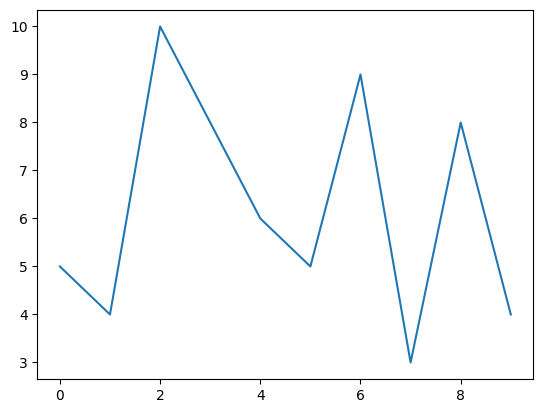

In [341]:
#default - 라인그래프 
plt.plot(data)

In [342]:
fig=plt.figure()

<Figure size 640x480 with 0 Axes>

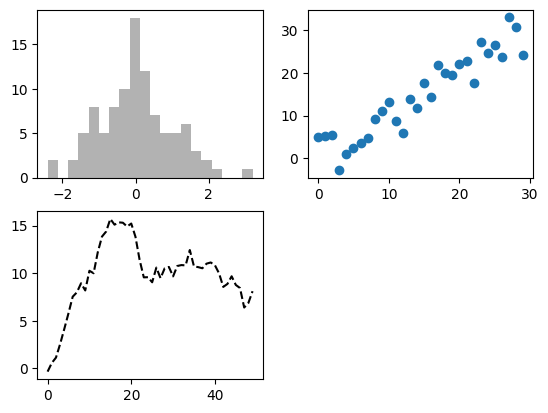

In [362]:
#서브플롯
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

ax1.hist(np.random.randn(100),bins=20,color='k',alpha=.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(),'k--')

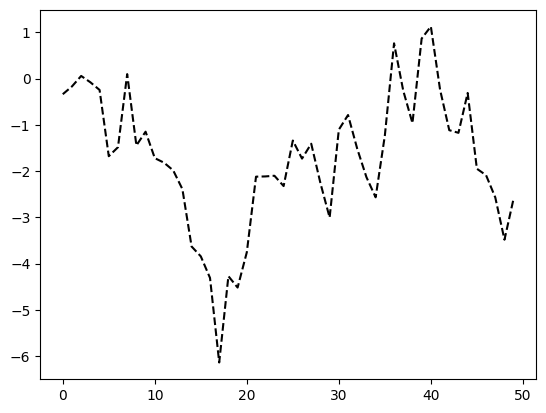

In [349]:
plt.plot(np.random.randn(50).cumsum(),'k--')

<Axes: >

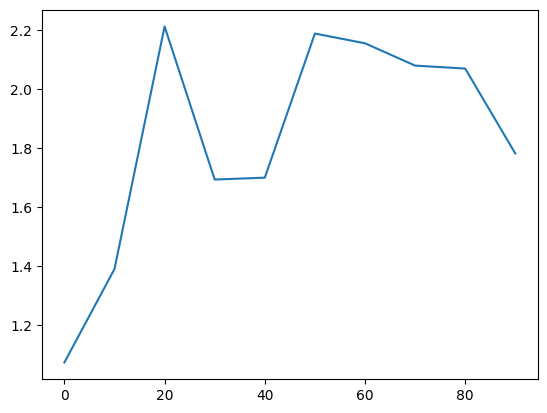

In [363]:
s=pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot()
#index가 x축으로 

<Axes: >

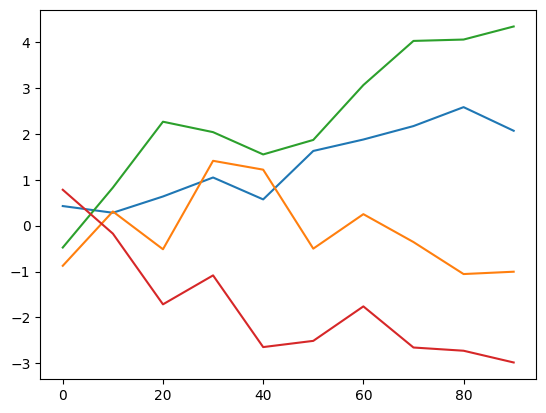

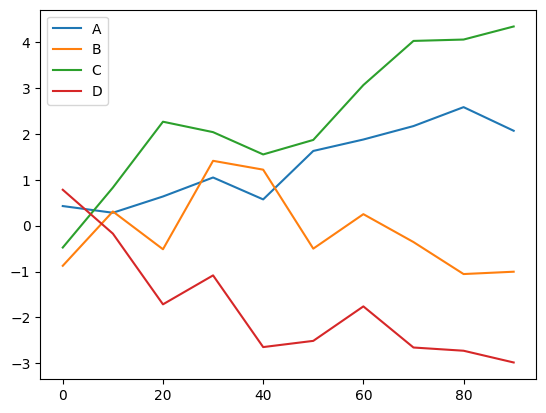

In [368]:
df=pd.DataFrame(np.random.randn(10,4).cumsum(0),
               columns=['A','B','C','D'], index=np.arange(0,100,10))
plt.plot(df)
df.plot()

ModuleNotFoundError: No module named 'scipy'

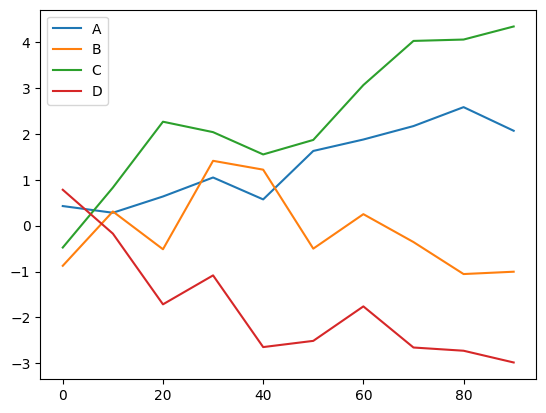

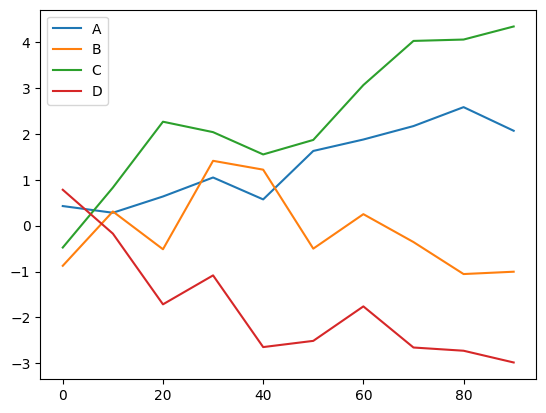

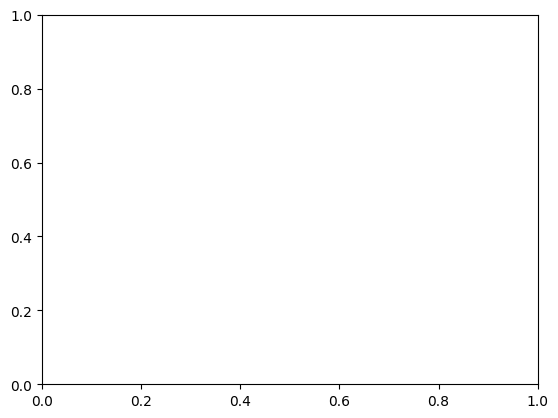

In [378]:
df.plot()
df.plot.line()
df.plot(kind='density')

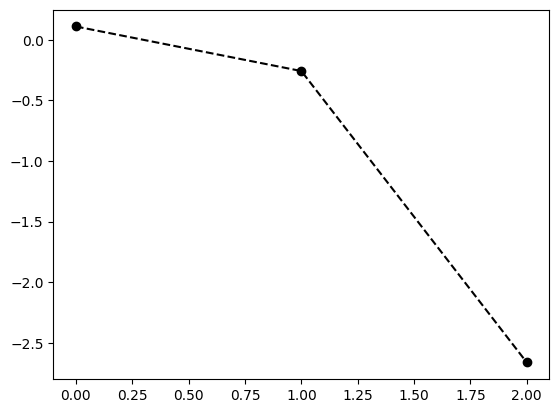

In [383]:
from numpy.random import randn
plt.plot(randn(3).cumsum(),'ko--')

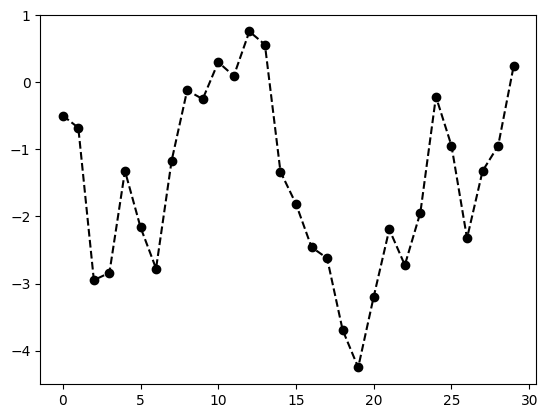

In [386]:
from numpy.random import randn
plt.plot(randn(30).cumsum(),color='k',linestyle='dashed',marker='o')

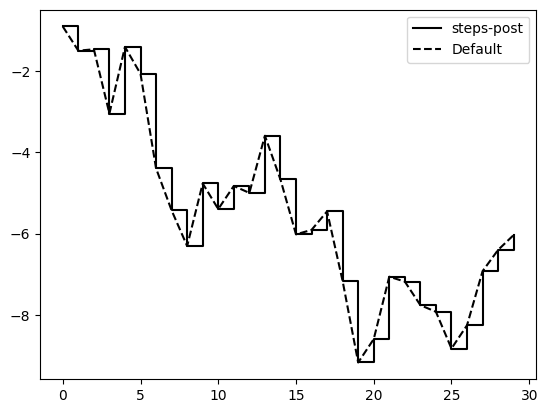

In [392]:
data=np.random.randn(30).cumsum()
plt.plot(data,'k-',drawstyle='steps-post', label='steps-post')
plt.plot(data,'k--',label='Default')
plt.legend(loc='best')

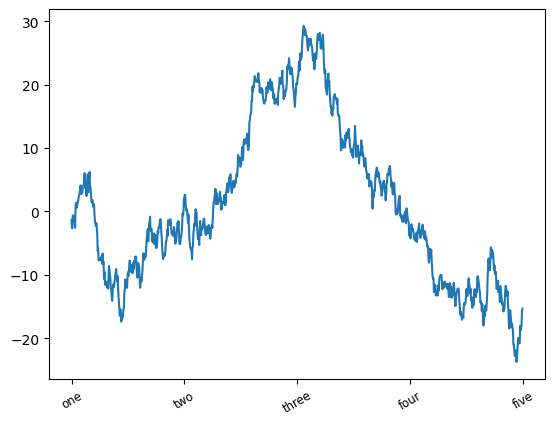

In [396]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

X축 범위 좌표 찍음 
ticks=ax.set_xticks([0,250,500,750,1000])
X축 좌표 범위의 이름 
labels=ax.set_xticklabels(['one','two','three','four','five'
                           ],rotation=30, fontsize='small')

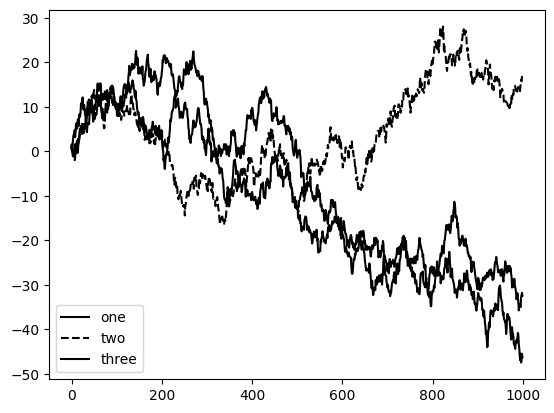